# Project: Soccer
![](title_pict/soccer2.png)

In [45]:
import matplotlib.pyplot as plt
import numpy as np

## Import Data
In this project, the [soccer-data-api](https://pypi.org/project/soccer-data-api/) package is used to import 
soccer data  from https://www.sports-reference.com/

Available leagues:
- English Premier League
- Spanish La Liga
- French Ligue 1
- German Bundesliga
- Italian Serie A
- Dutch Eredivisie
- Russian Premier League
- English Championship.

To install the package, use `!pip install soccer-data-api`.

In [14]:
# !pip install soccer-data-api

In [3]:
from soccer_data_api import SoccerDataAPI
soccer_data = SoccerDataAPI()

In [86]:
# methods
dir(soccer_data)[-9:]

['bundesliga',
 'english_championship',
 'english_premier',
 'eredivisie',
 'get_data',
 'la_liga',
 'ligue_1',
 'russian_premier',
 'serie_a']

## English Premier League
Each league is represented as a list.

In [5]:
ep = soccer_data.english_premier()
type(ep)

list

In [6]:
len(ep)

20

- The list elements consist of dictionaries for each team, ordered by their ranking.

In [39]:
ep

[{'team': 'Manchester City',
  'pos': '1',
  'points': '91',
  'matches_played': '38',
  'wins': '28',
  'draws': '28',
  'losses': '3',
  'goals_for': '96',
  'goals_against': '34',
  'goal_diff': '+62',
  'top_scorer': 'Erling Haaland - 27'},
 {'team': 'Arsenal',
  'pos': '2',
  'points': '89',
  'matches_played': '38',
  'wins': '28',
  'draws': '28',
  'losses': '5',
  'goals_for': '91',
  'goals_against': '29',
  'goal_diff': '+62',
  'top_scorer': 'Bukayo Saka - 16'},
 {'team': 'Liverpool',
  'pos': '3',
  'points': '82',
  'matches_played': '38',
  'wins': '24',
  'draws': '24',
  'losses': '4',
  'goals_for': '86',
  'goals_against': '41',
  'goal_diff': '+45',
  'top_scorer': 'Mohamed Salah - 18'},
 {'team': 'Aston Villa',
  'pos': '4',
  'points': '68',
  'matches_played': '38',
  'wins': '20',
  'draws': '20',
  'losses': '10',
  'goals_for': '76',
  'goals_against': '61',
  'goal_diff': '+15',
  'top_scorer': 'Ollie Watkins - 19'},
 {'team': 'Tottenham',
  'pos': '5',
  'po

In [87]:
ep[0]

{'team': 'Manchester City',
 'pos': '1',
 'points': '91',
 'matches_played': '38',
 'wins': '28',
 'draws': '28',
 'losses': '3',
 'goals_for': '96',
 'goals_against': '34',
 'goal_diff': '+62',
 'top_scorer': 'Erling Haaland - 27'}

- For each team, the following information is provided.

In [88]:
ep[0].keys()

dict_keys(['team', 'pos', 'points', 'matches_played', 'wins', 'draws', 'losses', 'goals_for', 'goals_against', 'goal_diff', 'top_scorer'])

### Most Scorer Team

In [11]:
max_goals_for = 0
max_goals_for_team = ''

for t in ep:
    if int(t['goals_for']) > max_goals_for:
        max_goals_for = int(t['goals_for'])
        max_goals_for_team = t['team']

print(f'Team         : {max_goals_for_team}')
print(f'Max Goals For: {max_goals_for}')

Team         : Manchester City
Max Goals For: 96


### Least Scorer Team

In [17]:
import numpy as np

min_goals_for = np.inf
min_goals_for_team = ''

for t in ep:
    if int(t['goals_for']) < min_goals_for:
        min_goals_for = int(t['goals_for'])
        min_goals_for_team = t['team']

print(f'Team         : {min_goals_for_team}')
print(f'Min Goals For: {min_goals_for}')

Team         : Sheffield Utd
Min Goals For: 35


### The most goals scored against 

In [13]:
max_goals_against = 0
max_goals_against_team = ''

for t in ep:
    if int(t['goals_against']) > max_goals_against:
        max_goals_against = int(t['goals_against'])
        max_goals_against_team = t['team']

print(f'Team             : {max_goals_against_team}')
print(f'Max Goals Against: {max_goals_against}')

Team             : Sheffield Utd
Max Goals Against: 104


### Top Scorer Player

In [25]:
top_score = 0
top_score_player = ''

for t in ep:
    ts = t['top_scorer']
    if int(ts[ts.rfind('-')+1:]) > top_score:
        top_score = int(ts[ts.find('-')+1:])
        top_score_player = ts[:ts.find('-')]

print(f'Top Scorer : {top_score_player}')
print(f'Top Score  : {top_score}')

Top Scorer : Erling Haaland 
Top Score  : 27


### Equal Scorer Players in a Team

In [27]:
top_score = 0
top_score_player = ''

for t in ep:
    ts = t['top_scorer']
    if ts.find(',') != -1:
        print(ts)

Rasmus Højlund, Bruno Fernandes - 10
Hwang Hee-chan, Matheus Cunha - 12
Abdoulaye Doucouré, Dominic Calvert-Lewin - 7
Oliver McBurnie, Ben Brereton - 6


### List of Teams and Points

In [90]:
teams, points = [], []

for t in ep:
    teams.append(t['team'])
    points.append(int(t['points']))

### Bar graph of points

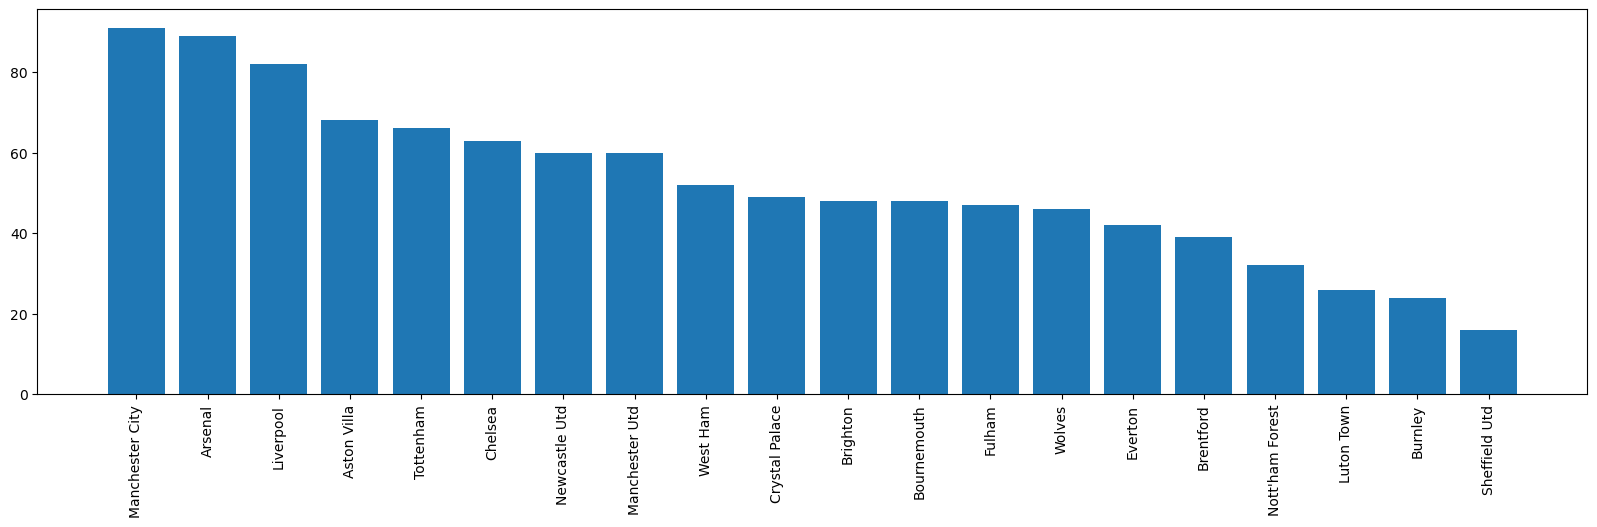

In [91]:
plt.figure(figsize=(20,5))
plt.bar(teams, points)
plt.xticks(rotation=90);

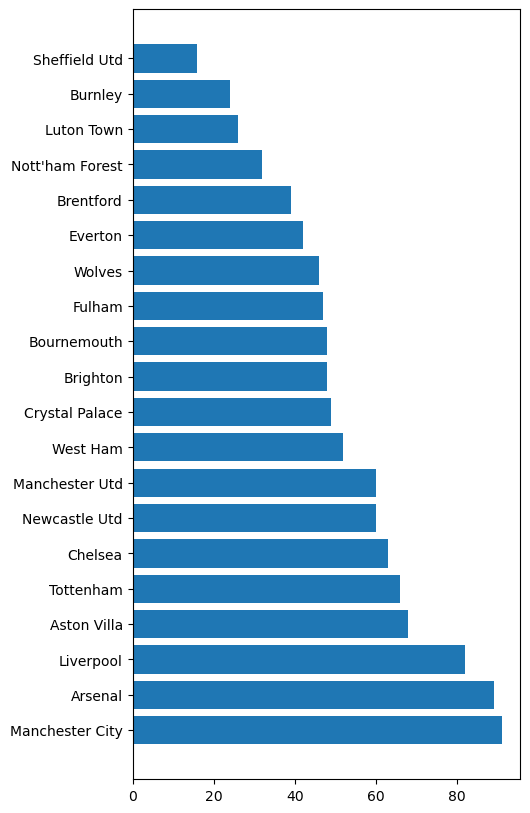

In [89]:
plt.figure(figsize=(5,10))
plt.barh( teams, points);

### Check Matches Played
- There is an issue with the data.
- The number of draws is incorrect.

In [81]:
for t in ep:
    if int(t['matches_played']) != int(t['wins']) + int(t['draws']) +int(t['losses']):
        print(t['team'], int(t['matches_played']), int(t['wins']), int(t['draws']), int(t['losses']) )

Manchester City 38 28 28 3
Arsenal 38 28 28 5
Liverpool 38 24 24 4
Aston Villa 38 20 20 10
Tottenham 38 20 20 12
Chelsea 38 18 18 11
Newcastle Utd 38 18 18 14
Manchester Utd 38 18 18 14
West Ham 38 14 14 14
Crystal Palace 38 13 13 15
Bournemouth 38 13 13 16
Fulham 38 13 13 17
Wolves 38 13 13 18
Everton 38 13 13 16
Brentford 38 10 10 19
Luton Town 38 6 6 24
Burnley 38 5 5 24
Sheffield Utd 38 3 3 28


## All Leagues
The following is the list of all the leagues available in the package.

In [40]:
leagues = [soccer_data.english_premier(),
soccer_data.la_liga(),
soccer_data.ligue_1(),
soccer_data.bundesliga(),
soccer_data.serie_a(),
soccer_data.eredivisie(),
soccer_data.russian_premier(),
soccer_data.english_championship()]

The following is the dictionary of all the leagues available in the package.

In [93]:
leagues_dict = {'english_premier':soccer_data.english_premier(),
'la_liga': soccer_data.la_liga(),
'ligue_1': soccer_data.ligue_1(),
'bundesliga': soccer_data.bundesliga(),
'serie_a': soccer_data.serie_a(),
'eredivisie': soccer_data.eredivisie(),
'russian_premier': soccer_data.russian_premier(),
'english_championship': soccer_data.english_championship()}

### Top Scorer Player

In [41]:
top_score = 0
top_score_player = ''

for league in leagues:
    for t in league:
        ts = t['top_scorer']
        if int(ts[ts.rfind('-')+1:]) > top_score:
            top_score = int(ts[ts.find('-')+1:])
            top_score_player = ts[:ts.find('-')]

print(f'Top Scorer : {top_score_player}')
print(f'Top Score  : {top_score}')

Top Scorer : Harry Kane 
Top Score  : 36


### The Team with Highest and Lowest Goal Differences

In [44]:
highest_goal_diff = 0
highest_goal_diff_team = ''
lowest_goal_diff = np.inf
lowest_goal_diff_team = ''


for league in leagues:
    for t in league:
        if int(t['goal_diff']) > highest_goal_diff:
            highest_goal_diff = int(t['goal_diff'])
            highest_goal_diff_team = t['team']
        if int(t['goal_diff']) < lowest_goal_diff:
            lowest_goal_diff = int(t['goal_diff'])
            lowest_goal_diff_team = t['team']

print(f'Highest Goal Diff : {highest_goal_diff}  ---  Team: {highest_goal_diff_team }')
print(f'Lowest  Goal Diff : {lowest_goal_diff}   ---  Team: {lowest_goal_diff_team }')

Highest Goal Diff : 90  ---  Team: PSV Eindhoven
Lowest  Goal Diff : -69   ---  Team: Sheffield Utd


### The League with Most Goal Scored 

In [76]:
max_total_goal = 0
max_total_goal_league = ''

for name, league in leagues_dict.items():
    total = 0
    for t in league:
        total += int(t['goals_for'])
    if total > max_total_goal:
        max_total_goal = total       
        max_total_goal_league = name

print(f'Most Goal Scored League : {max_total_goal_league}')
print(f'Maximum Total Goal      : {max_total_goal}')

Most Goal Scored League : english_championship
Maximum Total Goal      : 1480


### The Team with Highest Points Per Game  

In [66]:
max_point_pg = 0
max_point_pg_team = ''

for league in leagues:
    for t in league:
        ppg = int(t['points'])/int(t['matches_played'])
        if ppg > max_point_pg:
            max_point_pg = ppg
            max_point_pg_team = t['team']

print(f'Max Point Per Game : {max_point_pg}')
print(f'Team               : {max_point_pg_team}')

Max Point Per Game : 2.676470588235294
Team               : PSV Eindhoven


### The Teams with Highest Points Per Game  for Each League

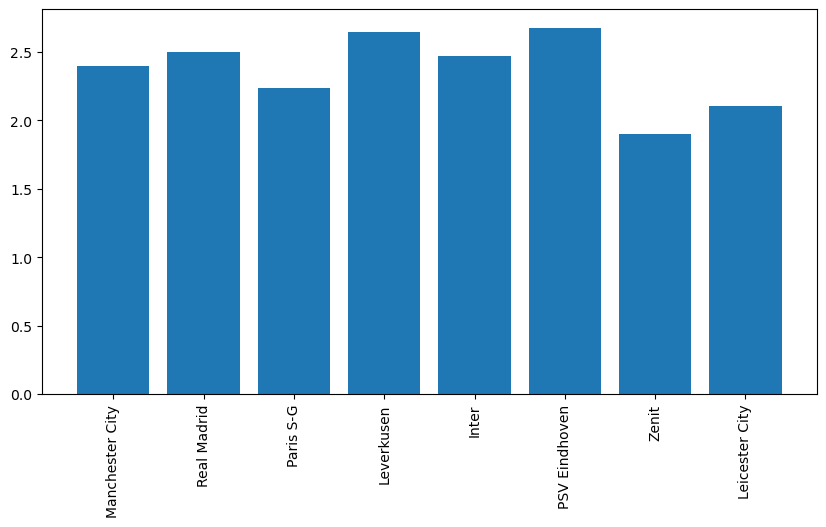

In [95]:
max_point_pg_list = []
max_point_pg_team_list = []


for league in leagues:
    max_point_pg = 0
    max_point_pg_team = ''
    for t in league:
        ppg = int(t['points'])/int(t['matches_played'])
        if ppg > max_point_pg:
            max_point_pg = ppg
            max_point_pg_team = t['team']
    
    max_point_pg_list.append(max_point_pg)
    max_point_pg_team_list.append(max_point_pg_team)
    
plt.figure(figsize=(10,5))
plt.bar(max_point_pg_team_list, max_point_pg_list)
plt.xticks(rotation=90);